In [2]:
import pandas as pd
import numpy as np
#import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
#import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [3]:
df1 = pd.read_csv('2_Employee_performance_withOutOutliers.csv')
df1.head(5)

,c_EmpNumber,q_Age,c_Gender,c_EducationBackground,c_MaritalStatus,c_EmpDepartment,c_EmpJobRole,c_BusinessTravelFrequency,q_DistanceFromHome,q_EmpEducationLevel,...,q_EmpRelationshipSatisfaction,q_TotalWorkExperienceInYears,q_TrainingTimesLastYear,q_EmpWorkLifeBalance,q_ExperienceYearsAtThisCompany,q_ExperienceYearsInCurrentRole,q_YearsSinceLastPromotion,q_YearsWithCurrManager,c_Attrition,y_PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
4,5,27,1,1,0,1,3,1,10,2,...,3,9,4,2,9,7,1,7,0,4


In [4]:
df1.shape

(1134, 28)

In [5]:
# Create All lists
AllColumns = ['c_EmpNumber', 'q_Age', 'c_Gender', 'c_EducationBackground',
       'c_MaritalStatus', 'c_EmpDepartment', 'c_EmpJobRole',
       'c_BusinessTravelFrequency', 'q_DistanceFromHome',
       'q_EmpEducationLevel', 'q_EmpEnvironmentSatisfaction',
       'q_EmpHourlyRate', 'q_EmpJobInvolvement', 'q_EmpJobLevel',
       'q_EmpJobSatisfaction', 'q_NumCompaniesWorked', 'c_OverTime',
       'q_EmpLastSalaryHikePercent', 'q_EmpRelationshipSatisfaction',
       'q_TotalWorkExperienceInYears', 'q_TrainingTimesLastYear',
       'q_EmpWorkLifeBalance', 'q_ExperienceYearsAtThisCompany',
       'q_ExperienceYearsInCurrentRole', 'q_YearsSinceLastPromotion',
       'q_YearsWithCurrManager', 'c_Attrition', 'y_PerformanceRating']
ConVarList= ['q_Age','q_DistanceFromHome','q_EmpEducationLevel', 'q_EmpEnvironmentSatisfaction','q_EmpHourlyRate', 'q_EmpJobInvolvement', 'q_EmpJobLevel',
       'q_EmpJobSatisfaction', 'q_NumCompaniesWorked','q_EmpLastSalaryHikePercent', 'q_EmpRelationshipSatisfaction',
       'q_TotalWorkExperienceInYears', 'q_TrainingTimesLastYear','q_EmpWorkLifeBalance', 'q_ExperienceYearsAtThisCompany',
       'q_ExperienceYearsInCurrentRole', 'q_YearsSinceLastPromotion','q_YearsWithCurrManager']
CatVarList=['c_EmpNumber', 'c_Gender', 'c_EducationBackground','c_MaritalStatus', 'c_EmpDepartment', 'c_EmpJobRole',
       'c_BusinessTravelFrequency','c_OverTime','c_Attrition']
OutcomeVar=['y_PerformanceRating']

# Check Multi-Collinearity - using Correlation on predictor continuous variables

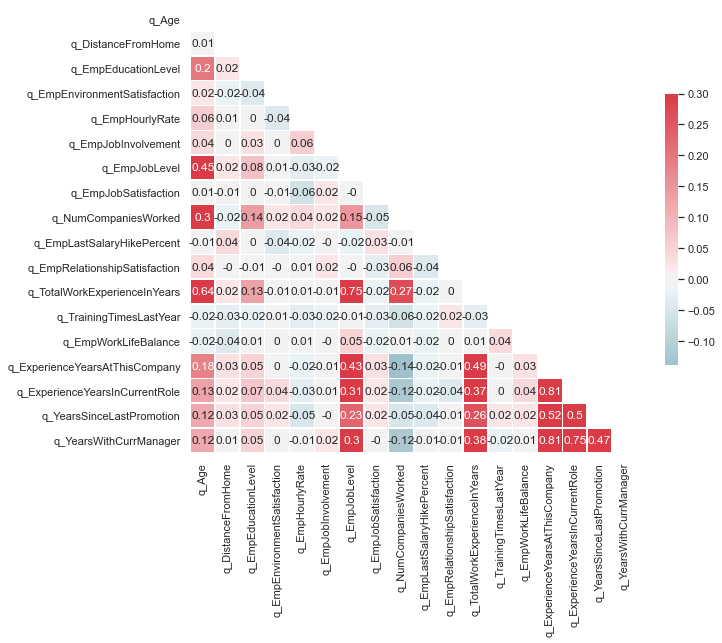

In [6]:
# Run Correlation
Corr_ConVarList= df1[ConVarList].corr().round(2)
# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(Corr_ConVarList, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 10,10
sb.heatmap(Corr_ConVarList,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

# where ever the value of r >.75, it means very high correlation. we can look at deleting on eof the intersecting variables.
# In this case no strong correlations so no multicollinearity

# Checking if each categoriable variable has a statistically signifcant association with categorical outcome variable
Below sample is for just one, we have to do for every combination of categorical predictor with outcome varibales

In [7]:
#Null Hypothesis: There is no association between the variables

print(pd.crosstab(df1.c_EmpJobRole, df1.y_PerformanceRating))
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df1.c_EmpJobRole, df1.y_PerformanceRating))

print("Chi     :",chi2)
print("P-value :",p)
print("dof     :",dof)
print("expected:",expected)

# Repeat the above for every combination and you will get the result:
#p-value:0.0 < 0.05. Therefore c_EmpJobRole is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Empeducationbackround is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Empmarital_status is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Gender is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_sex is IMPORTANT for Prediction

y_PerformanceRating   2    3   4
c_EmpJobRole                    
0                     0   12   3
1                     1   17   2
2                     0   11   0
3                     6  185  31
4                    13   30   4
5                     8   20   3
6                     9   31   5
7                    14   45   5
8                     5   20   6
9                    15   62  10
10                    3   27   2
11                    3    8   3
12                   17   46  13
13                   60  175  25
14                   12   54   3
15                    6   38   6
16                    4   10   1
17                    0    7   0
18                    1   33   4
Chi     : 85.30484806850187
P-value : 7.000968522366442e-06
dof     : 36
expected: [[  2.34126984  10.99206349   1.66666667]
 [  3.12169312  14.65608466   2.22222222]
 [  1.71693122   8.06084656   1.22222222]
 [ 34.65079365 162.68253968  24.66666667]
 [  7.33597884  34.44179894   5.22222222]
 [  4.83862434

In [10]:
# Import All classifcation Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [11]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold

In [12]:
df1 = pd.read_csv('2_Employee_performance_withOutOutliers.csv')
df1.head(5)

,c_EmpNumber,q_Age,c_Gender,c_EducationBackground,c_MaritalStatus,c_EmpDepartment,c_EmpJobRole,c_BusinessTravelFrequency,q_DistanceFromHome,q_EmpEducationLevel,...,q_EmpRelationshipSatisfaction,q_TotalWorkExperienceInYears,q_TrainingTimesLastYear,q_EmpWorkLifeBalance,q_ExperienceYearsAtThisCompany,q_ExperienceYearsInCurrentRole,q_YearsSinceLastPromotion,q_YearsWithCurrManager,c_Attrition,y_PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
4,5,27,1,1,0,1,3,1,10,2,...,3,9,4,2,9,7,1,7,0,4


In [13]:
X1 = df1.iloc[:,:-1]
y1 = df1.y_PerformanceRating

In [14]:
# Split
seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=seed, test_size=.3)

In [15]:
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB_gbtree', XGBClassifier(booster='gbtree')))
models.append(('XGB_dart', XGBClassifier(booster='dart')))
models.append(('SVM', SVC()))
models.append(('ANN', MLPClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [17]:
# evaluate each model in turn with X1, y1 based on Accuracy
import warnings
warnings.filterwarnings("ignore")
seed = 10
results = []
names = []
output = []
score = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model,np.array(X1_train),np.array(y1_train),cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    output.append(msg)

# Take top 2-3 algorithms that give best accuracy
print(output)

[16:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

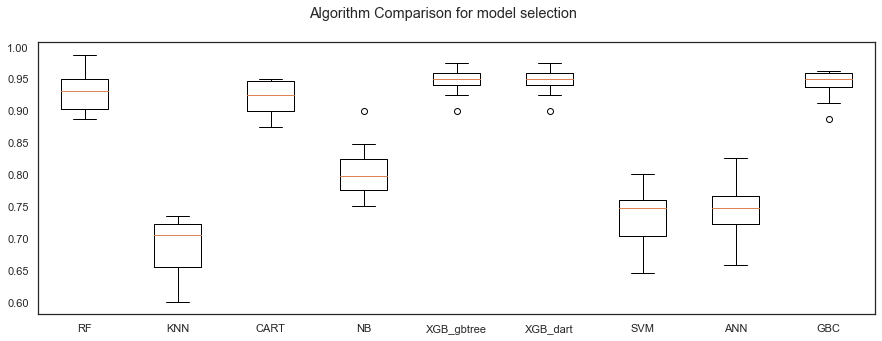

In [18]:
# boxplot KFold using 10 splits - algorithm comparison
rcParams['figure.figsize'] =15,5

# Put figure title
fig = plt.figure()
fig.suptitle('Algorithm Comparison for model selection')
ax = fig.add_subplot(111)
# draw plot
plt.boxplot(results)
# label in X axis
ax.set_xticklabels(names)
# Show the plot
plt.show()